In [1]:
import sys
sys.path.append('D:/ERA/ERA_V1/ERA_V2/Assignment_11')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from utils import train_transforms,test_transforms
from main import S_11
from models.resnet import ResNet18,ResNet34
from torch_lr_finder import LRFinder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')
model = ResNet18().to(device)
trainer = S_11(model,train_transforms=train_transforms,test_transforms=test_transforms,classes=classes,scheduler_type='onecycle')


 ==> Preparing data... 
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.85E+00


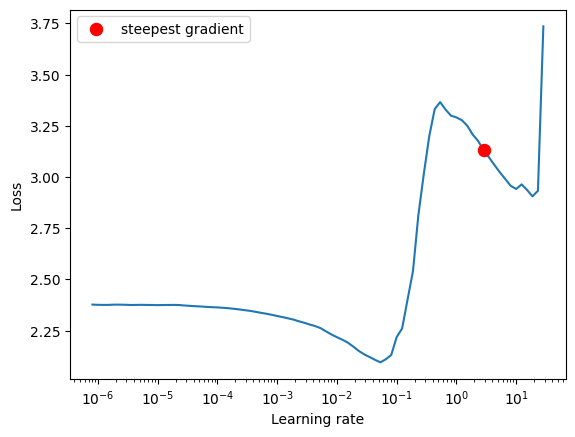

==> Starting Training & Testing
Epoch 1/20


Loss=1.7511 Accuracy=32.74: 100%|██████████| 98/98 [01:24<00:00,  1.16it/s]



Test set: Average loss: 2.0214, Accuracy: 3474/10000 (34.74%)
Epoch 2/20


Loss=1.3942 Accuracy=47.92: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 1.5485, Accuracy: 4461/10000 (44.61%)
Epoch 3/20


Loss=1.2407 Accuracy=55.95: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]



Test set: Average loss: 1.3249, Accuracy: 5343/10000 (53.43%)
Epoch 4/20


Loss=1.0212 Accuracy=61.61: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]



Test set: Average loss: 1.1603, Accuracy: 5935/10000 (59.35%)
Epoch 5/20


Loss=0.9437 Accuracy=66.67: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]



Test set: Average loss: 1.0714, Accuracy: 6417/10000 (64.17%)
Epoch 6/20


Loss=0.7337 Accuracy=71.73: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]



Test set: Average loss: 0.9443, Accuracy: 6773/10000 (67.73%)
Epoch 7/20


Loss=0.5491 Accuracy=81.25: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]



Test set: Average loss: 0.8011, Accuracy: 7247/10000 (72.47%)
Epoch 8/20


Loss=0.4820 Accuracy=82.14: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]



Test set: Average loss: 0.7121, Accuracy: 7611/10000 (76.11%)
Epoch 9/20


Loss=0.5034 Accuracy=83.33: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.8197, Accuracy: 7356/10000 (73.56%)
Epoch 10/20


Loss=0.4280 Accuracy=83.93: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]



Test set: Average loss: 0.7327, Accuracy: 7726/10000 (77.26%)
Epoch 11/20


Loss=0.2980 Accuracy=88.39: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]



Test set: Average loss: 0.9302, Accuracy: 7233/10000 (72.33%)
Epoch 12/20


Loss=0.3060 Accuracy=88.69: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]



Test set: Average loss: 0.9894, Accuracy: 7269/10000 (72.69%)
Epoch 13/20


Loss=0.3042 Accuracy=88.39: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]



Test set: Average loss: 1.4718, Accuracy: 6430/10000 (64.30%)
Epoch 14/20


Loss=0.3491 Accuracy=87.80: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.8722, Accuracy: 7616/10000 (76.16%)
Epoch 15/20


Loss=0.3091 Accuracy=91.07: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]



Test set: Average loss: 0.6975, Accuracy: 7921/10000 (79.21%)
Epoch 16/20


Loss=0.1858 Accuracy=93.75: 100%|██████████| 98/98 [01:11<00:00,  1.36it/s]



Test set: Average loss: 0.7859, Accuracy: 7752/10000 (77.52%)
Epoch 17/20


Loss=0.1183 Accuracy=94.94: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]



Test set: Average loss: 0.6666, Accuracy: 8177/10000 (81.77%)
Epoch 18/20


Loss=0.0983 Accuracy=96.73: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]



Test set: Average loss: 0.6054, Accuracy: 8331/10000 (83.31%)
Epoch 19/20


Loss=0.0661 Accuracy=97.92: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]



Test set: Average loss: 0.5584, Accuracy: 8603/10000 (86.03%)
Epoch 20/20


Loss=0.0348 Accuracy=99.11: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s] 



Test set: Average loss: 0.4966, Accuracy: 8724/10000 (87.24%)


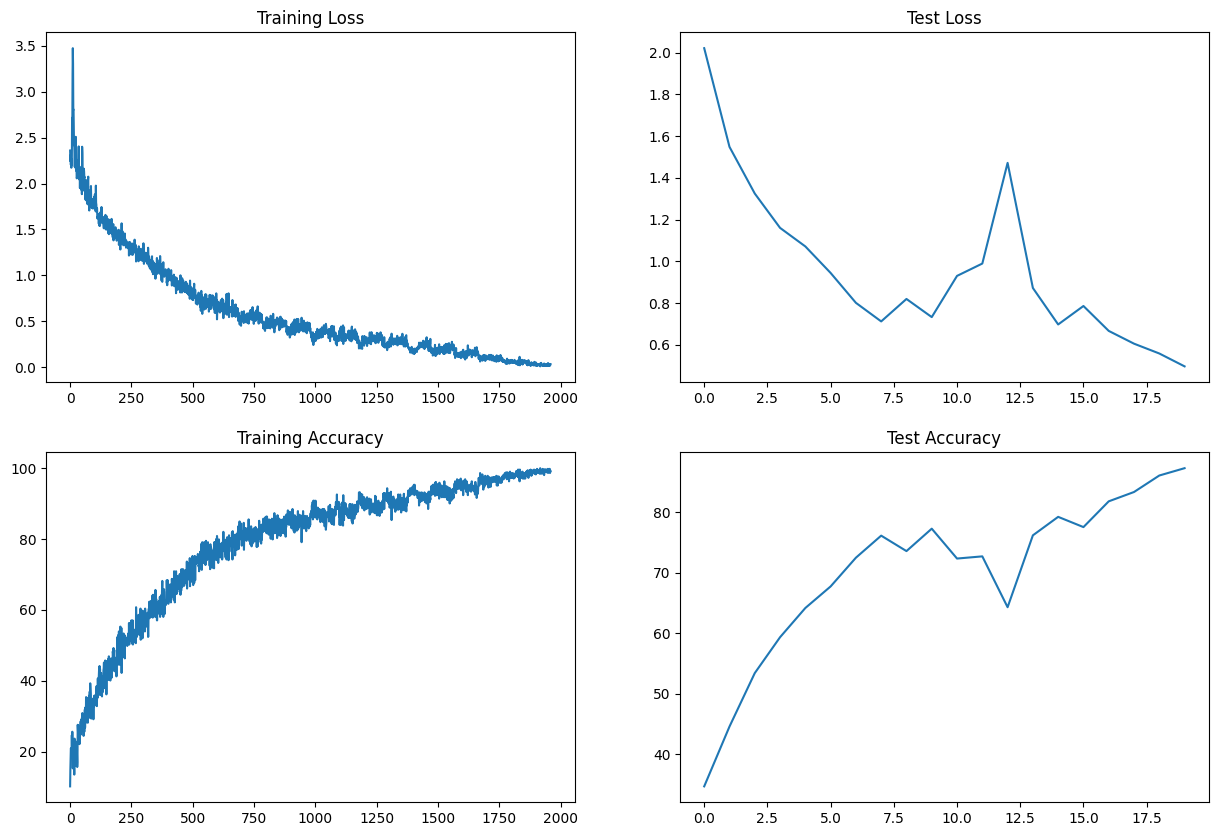

In [3]:
trainer.run()


In [2]:
from utils import MisclassificationVisualizer,GradCamVisualizer

train_loader , test_loader = trainer.split_data()
# Create an instance of the visualizer
visualizer = MisclassificationVisualizer(model, device, test_loader, classes)

# Find and visualize misclassified images
visualizer.find_and_visualize_misclassified_images(num_images=10)


c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


NameError: name 'trainer' is not defined

In [ ]:
visualizer = GradCamVisualizer(model, device, test_loader, classes)
visualizer.visualize(target_layer=model.layer4[-1], num_images=10)

NameError: name 'GradCamVisualizer' is not defined